C:\Users\souma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'S' '0' '0' '0' '0' 'G' '0' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.66it/s]


Finish


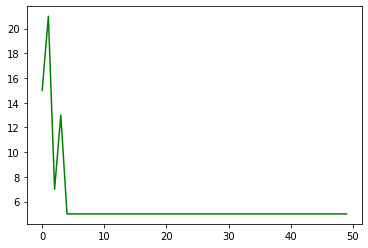

In [ ]:
from environment import Maze
from agent import Agent
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import numpy as np
from scipy.stats.mstats import mquantiles
import pandas as pd
from tqdm import tqdm 
x_list = []

def train():
    kernel = 2 # Thickness of the outer wall of the maze (extension)
    start = [1, 1] # Specify the start position
    goal = [1, 6] # Specify the goal position

    log_step_all = []


    """Automatically generate a maze"""
    env = Maze(7, 7) # Specify the size of the maze
    env.set_out_wall() # Surround the maze with walls
    env.set_start_goal(start, goal) # Specify start and goal
    env.bg_maze(kernel) # Expand the maze cells by the kernel amount

    """Generate an agent in the environment and train"""
    epochs =  1 # Number of episode trials
    episode_count = 50 # Number of episodes
#     for epoch in tqdm(range(1, epochs+1)):
    for epoch in range(1, epochs+1):
        epsilon = 0.1
        agent = Agent(env.maze, action_num=4)
        env.run(agent, epoch, episode_count)
        log_step_all.append(env.a_list)

    print('Finish')
    
    x = np.arange(episode_count)
    x_list.append(x)
#     print(log_step_all)
    mean = np.array(log_step_all).mean(axis=0)
    std = np.array(log_step_all).std(axis=0)


#     plt.fill_between(x, mean + std, mean - std, alpha=0.2, color='green')
    plt.plot(x, mean, color='green')
    plt.show()

#     df = pd.DataFrame(log_step_all)
#     df.to_csv('log_test.csv', index=False)

    
#     df = pd.DataFrame(list(zip(mean, std, mean+std, mean-std)), columns=['mean', 'std', '+', '-'])
#     df.to_csv('VBG_(7,7)_LR.csv', index=False)

if __name__ == "__main__":
    train()